# Maturità 2023 - Quesito 8

> Data la funzione $f(x)=x^5-5ax+a$, definita nell'insieme dei numeri reali, stabilire per quali valori del parametro $a>0$ la funzione possiede tre zeri reali distinti.

In [1]:
# Toolbox simbolico
from sympy import *

## Strategia 1: Attraverso lo studio di funzione

In [2]:
# Definizione variabili simboliche e funzione (come espressione)
# Specifichiamo il fatto che sono reali e nulla del mondo complesso ci interessa
x = symbols('x', real=True)
a = symbols('a', real=True, positive=True)
f = x**5 -5*a*x+a
print("Funzione:")
display(f)

Funzione:


-5*a*x + a + x**5

In [3]:
print("Limite a -oo:")
display(limit(f, x, -oo))

print("Limite a +oo:")
display(limit(f, x, +oo))

Limite a -oo:


-oo

Limite a +oo:


oo

In [4]:
print("Derivata prima:")
fp = diff(f,x)
display(fp)

Derivata prima:


-5*a + 5*x**4

In [5]:
print("Zeri della derivata prima:")
fzero = solve(fp,x)
display(fzero)

Zeri della derivata prima:


[-a**(1/4), a**(1/4)]

In [6]:
print("Valutazione della funzione negli zeri della derivata prima:")
y1 = f.subs(x,fzero[0])
y2 = f.subs(x,fzero[1])
display(y1,y2)

Valutazione della funzione negli zeri della derivata prima:


4*a**(5/4) + a

-4*a**(5/4) + a

In [7]:
# Studio del segno della derivata prima
print("Derivata prima < 0:")
display(solveset(fp<0, x, S.Reals))

print("Derivata prima > 0:")
display(solveset(fp>0, x, S.Reals))

Derivata prima < 0:


Interval.open(-a**(1/4), a**(1/4))

Derivata prima > 0:


Union(Interval.open(-oo, -a**(1/4)), Interval.open(a**(1/4), oo))

In [8]:
# Soluzione vincoli
print("Soluzione massimo sopra l'asse x:")
s1 = solveset(y1>0, a, S.Reals)
display(s1)

print("Soluzione minimo sotto l'asse x:")
s2 = solveset(y2<0, a, S.Reals)
display(s2)

print("Soluzione finale come intersezione delle due:")
s = s1.intersect(s2)
display(s)

Soluzione massimo sopra l'asse x:


Reals

Soluzione minimo sotto l'asse x:


Interval.open(1/256, oo)

Soluzione finale come intersezione delle due:


Interval.open(1/256, oo)

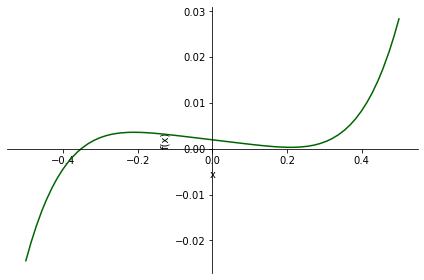

In [9]:
# Disegno la funzione per i tre valori
# Caso 0 < a < 1/256
f_caso1 = f.subs(a, 1/256/2) 
plot(f_caso1, (x, -1/2, 1/2), line_color='darkgreen')

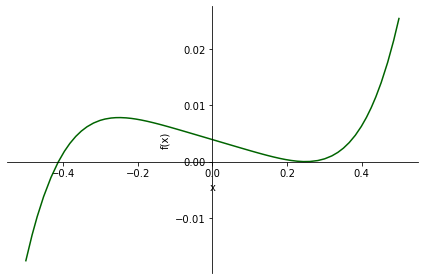

In [10]:
# Caso  a = 1/256
f_caso2 = f.subs(a, 1/256) 
plot(f_caso2, (x, -1/2, 1/2), line_color='darkgreen')

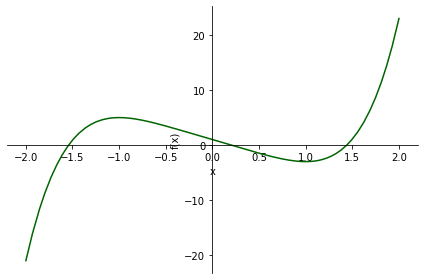

In [11]:
# Caso a > 1/256
f_caso3 = f.subs(a, 1) 
plot(f_caso3, (x, -2, 2), line_color='darkgreen')

## Strategia 2: Attraverso il teorema di Sturm

In [12]:
# Definizione del polinomio
P = Poly(x**5 -5*a*x+a, x)
print("Polinomio")
display(P)

Polinomio


Poly(x**5 - 5*a*x + a, x, domain='ZZ[a]')

In [13]:
# Esempio di divisione con resto tra P e il suo polinomio derivato
Pprime = diff(P,x)
print("Polinomio derivato")
display(P)

# Esempio di divisione con resto
display(quo(P,Pprime))
display(rem(P,Pprime))

Polinomio derivato


Poly(x**5 - 5*a*x + a, x, domain='ZZ[a]')

Poly(1/5*x, x, domain='ZZ(a)')

Poly(-4*a*x + a, x, domain='ZZ[a]')

In [14]:
print("Successione di Sturm")
Psturm = sturm(P)
Psturm

Successione di Sturm


[Poly(x**5 - 5*a*x + a, x, domain='ZZ(a)'),
 Poly(5*x**4 - 5*a, x, domain='ZZ(a)'),
 Poly(4*a*x - a, x, domain='ZZ(a)'),
 Poly(5*a - 5/256, x, domain='ZZ(a)')]

In [15]:
# Termini principali (leading term) per la valutazione a -oo e a +oo
terminiprincipali = [LT(psturm) for psturm in Psturm]
print("Termini principali")
terminiprincipali

Termini principali


[x**5, 5*x**4, 4*a*x, 5*a - 5/256]

In [16]:
# Essendo a>0 il segno dipenderà solo dall'ultimo termine
sa = solve(terminiprincipali[-1], a)
print("Termine discriminante per a:")
display(sa)

Termine discriminante per a:


[1/256]

In [17]:
print("Variazioni caso 0 < a < 1/256")
V_minf = ["-","+","-","-"]
V_pinf = ["+","+","+","-"]
print(2 - 1)

Variazioni caso 0 < a < 1/256
1


In [18]:
print("Variazioni caso a = 1/256")
V_minf = ["-","+","-"]
V_pinf = ["+","+","+"]
print(2 - 0)

Variazioni caso a = 1/256
2


In [19]:
print("Variazioni caso a > 1/256")
V_minf = ["-","+","-","+"]
V_pinf = ["+","+","+","+"]
print(3 - 0)

Variazioni caso a > 1/256
3
